In [1]:
import os
import json
import nibabel as nib
from tqdm import tqdm
import matplotlib.pyplot as plt

data_dir = '/data_hdd/users/lisikuang/amos22/'
json_file_name = os.path.join(data_dir, 'dataset.json')

In [2]:
val_cnt = {}
mn = 1e9
mx = -1e9
with open(json_file_name) as json_file:
    json_data = json.load(json_file)
    for label in ['training', 'validation', 'test']:
        print(f'processing {label} data:')
        for image_label_pair in tqdm(json_data[label]):
            image_file = os.path.join(data_dir, image_label_pair['image'])
            image_obj = nib.load(image_file)
            image_array = image_obj.get_fdata()
            mn = min(mn, image_array.min())
            mx = max(mx, image_array.max())
            H, W, D = image_array.shape
            for x in range(H):
                for y in range(W):
                    for z in range(D):
                        val = int(image_array[x, y, z])
                        if val not in val_cnt:
                            val_cnt[val] = 0
                        val_cnt[val] += 1
print(mn, mx)

processing training data:


100%|██████████| 240/240 [1:10:41<00:00, 17.67s/it]


processing validation data:


100%|██████████| 120/120 [37:18<00:00, 18.66s/it]


processing test data:


100%|██████████| 240/240 [1:19:05<00:00, 19.77s/it]

-5798.0 1265.0


In [45]:
print(mn, mx)
print(len(val_cnt.keys()))

-5798.0 3284530
43362


In [44]:
from math import sqrt

mean = 0
std = 0
cnt = 0
for val in sorted(val_cnt):
    mean += val * val_cnt[val]
    cnt += val_cnt[val]
mean /= cnt
for val in sorted(val_cnt):
    std += ((val - mean) ** 2) * val_cnt[val]
std = sqrt(std / cnt)
print(cnt, mean, std)

25197080064 -277.6655390597008 7598.694741902908


In [46]:
percentile_00_5 = mn - 1
percentile_99_5 = mx + 1
cur_cnt = 0
while cur_cnt < cnt * 0.005:
    percentile_00_5 += 1
    if percentile_00_5 in val_cnt:
        cur_cnt += val_cnt[percentile_00_5]
cur_cnt = 0
while cur_cnt < cnt * 0.005:
    percentile_99_5 -= 1
    if percentile_99_5 in val_cnt:
        cur_cnt += val_cnt[percentile_99_5]
print(percentile_00_5, percentile_99_5)

-3024.0 23872


In [43]:
max_cnt = 0
max_cnt_val = 0

for val in sorted(val_cnt):
    if val_cnt[val] > max_cnt:
        max_cnt = val_cnt[val]
        max_cnt_val = val
print(max_cnt, max_cnt_val)

821832751 -1024


In [34]:
val_cnt[-1024] = 0
val_cnt[-2048] = 0
val_cnt[-3024] = 0
val_cnt[0] = 0
val_cnt[-998] = 0
val_cnt[-999] = 0
val_cnt[-997] = 0
val_cnt[-1000] = 0

In [41]:
val_cnt[-1024] = 821832751
val_cnt[-2048] = 805116778
val_cnt[-3024] = 598575824
val_cnt[0] = 517697818
val_cnt[-998] = 443266292
val_cnt[-999] = 437280149
val_cnt[-997] = 436783803
val_cnt[-1000] = 419750489

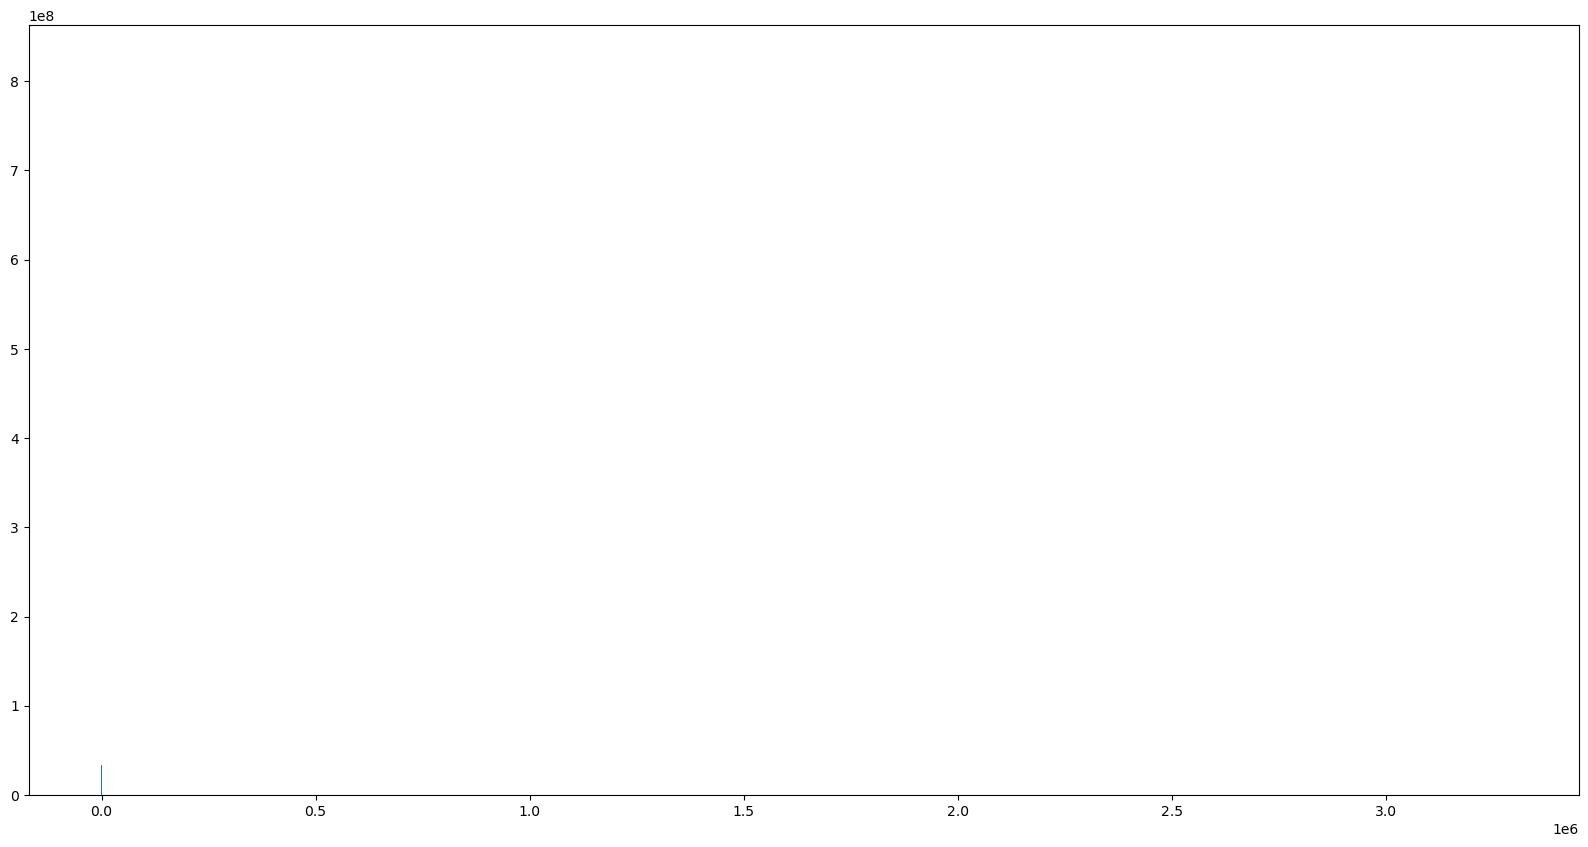

In [42]:
plt.rcParams["figure.figsize"] = (20, 10)

vals = []
cnts = []
for val in sorted(val_cnt):
    vals.append(val)
    cnts.append(val_cnt[val])
plt.bar(vals, cnts, width=1.0)
plt.show()